In [1]:
import seaborn as sns #visualization
import pandas as pd #create dataframe
import numpy as np #just in case 
import matplotlib.pyplot as plt #visualization
import plotly.express as px #visualization suggested by my tutor
import math #for ceiling in histogram visualization

sns.set(style = 'white')

In [2]:
df = pd.read_csv('telco.csv')
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_type,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check
monthly_charges,65.6,59.9,73.9,98.0,83.9


In [3]:
df.dtypes

customer_id                object
gender                     object
is_senior_citizen           int64
partner                    object
dependents                 object
phone_service               int64
internet_service            int64
contract_type               int64
payment_type               object
monthly_charges           float64
total_charges             float64
churn                      object
tenure                    float64
is_female                    bool
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_phone_internet           bool
partner_dependents          int64
calculated_monthly_avg     object
validate                   object
phone_service_type         object
Internet_service_type      object
Contract_type              object
rounded_tenure            float64
Service_type               object
Tenure_binned              object
dtype: object

In [4]:
#find null values, since they represent 11/7049 values, comfortable removing them 
df.isna().sum()

customer_id                0
gender                     0
is_senior_citizen          0
partner                    0
dependents                 0
phone_service              0
internet_service           0
contract_type              0
payment_type               0
monthly_charges            0
total_charges             11
churn                      0
tenure                     0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_internet         0
partner_dependents         0
calculated_monthly_avg     0
validate                   0
phone_service_type         0
Internet_service_type      0
Contract_type              0
rounded_tenure             0
Service_type               0
Tenure_binned              0
dtype: int64

In [5]:
#drop nulls
df = df.dropna()

In [6]:
#df.info() #calculated_monthly_avg is an object, change it to a float

df['calculated_monthly_avg'] = df['calculated_monthly_avg'].astype(float, errors = 'raise')

In [7]:
#remove : ' (automatic)'' from payment_type to make eventual plot labels easier

df['payment_type'] = df['payment_type'].str.replace(' (automatic)', '', regex = False)

In [8]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female',
       'has_churned', 'has_phone ', 'has_internet', 'has_phone_internet',
       'partner_dependents', 'calculated_monthly_avg', 'validate',
       'phone_service_type', 'Internet_service_type', 'Contract_type',
       'rounded_tenure', 'Service_type', 'Tenure_binned'],
      dtype='object')

In [9]:
#subset MTM churn only
new_mtm_df = (df['Contract_type'] == 'Month-to-Month')
mtm_df = df[new_mtm_df]
mtm_df.shape

(3876, 27)

In [10]:
mtm_df.has_churned.sum()

1656

In [11]:
#get booleans for 1 & 2 year, subset

new_df = (df['Contract_type'] == '1 Year') | (df['Contract_type'] == '2 Year')

df_c = df[new_df] #subset

df_c.shape #subsetted, its now 3162 x 27

(3162, 27)

In [12]:
#subset of 1 & 2 Year contracts as a percentage 

round(df_c.Contract_type.value_counts('1 Year', '2 Year') * 100, 2)

2 Year    53.35
1 Year    46.65
Name: Contract_type, dtype: float64

In [13]:
# how many of these contracted customers churned?
df_c.has_churned.sum()

214

In [14]:
# percentage of overall churn (w/MTM included)

overall_churn = round(df.has_churned.sum()/len(df) * 100, 2)

print(f'The rate of churn for all customers  is {overall_churn}%.') #26.57% is higher than industry average of 21%

The rate of churn for all customers  is 26.57%.


In [15]:
#calculate MTM churn percentage

mtm_percent_churned = round(mtm_df.has_churned.sum() / len(mtm_df) * 100, 2)
print(f'Month-to-Month customers churn {mtm_percent_churned}% of the time.')

Month-to-Month customers churn 42.72% of the time.


In [16]:
#get yearly contract churn as a percentage

percent_churned = round(df_c.has_churned.sum() / len(df_c) * 100, 2)
print(f'The rate of churn for customers with yearly contracts is {percent_churned}%.')

The rate of churn for customers with yearly contracts is 6.77%.


In [17]:
df.Contract_type.value_counts() #MTM = 3876

Month-to-Month    3876
2 Year            1687
1 Year            1475
Name: Contract_type, dtype: int64

In [18]:
#expressed as a percentage, 55.07% of customers in this dataset are MTM

round(df.Contract_type.value_counts('1 Year', '2 Year') * 100, 2)

Month-to-Month    55.07
2 Year            23.97
1 Year            20.96
Name: Contract_type, dtype: float64

In [19]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female',
       'has_churned', 'has_phone ', 'has_internet', 'has_phone_internet',
       'partner_dependents', 'calculated_monthly_avg', 'validate',
       'phone_service_type', 'Internet_service_type', 'Contract_type',
       'rounded_tenure', 'Service_type', 'Tenure_binned'],
      dtype='object')

In [20]:
df.shape

(7038, 27)

In [21]:
#remove redundant columns and columns w/ no useful info

df.drop(['customer_id', 'has_churned', 'rounded_tenure'], axis = 1, inplace = True, errors = 'raise')
df.columns

Index(['gender', 'is_senior_citizen', 'partner', 'dependents', 'phone_service',
       'internet_service', 'contract_type', 'payment_type', 'monthly_charges',
       'total_charges', 'churn', 'tenure', 'is_female', 'has_phone ',
       'has_internet', 'has_phone_internet', 'partner_dependents',
       'calculated_monthly_avg', 'validate', 'phone_service_type',
       'Internet_service_type', 'Contract_type', 'Service_type',
       'Tenure_binned'],
      dtype='object')

In [22]:
#get booleans for 1 & 2 year, subset

new_df = (df['Contract_type'] == '1 Year') | (df['Contract_type'] == '2 Year')

df_c = df[new_df] #subset

df_c.shape #subsetted, its now 3162 x 24


(3162, 24)

<AxesSubplot:xlabel='churn', ylabel='tenure'>

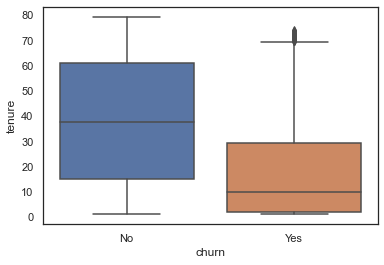

In [23]:
#monthly tenure and churn
sns.boxplot(x = df.churn, y = df.tenure)

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

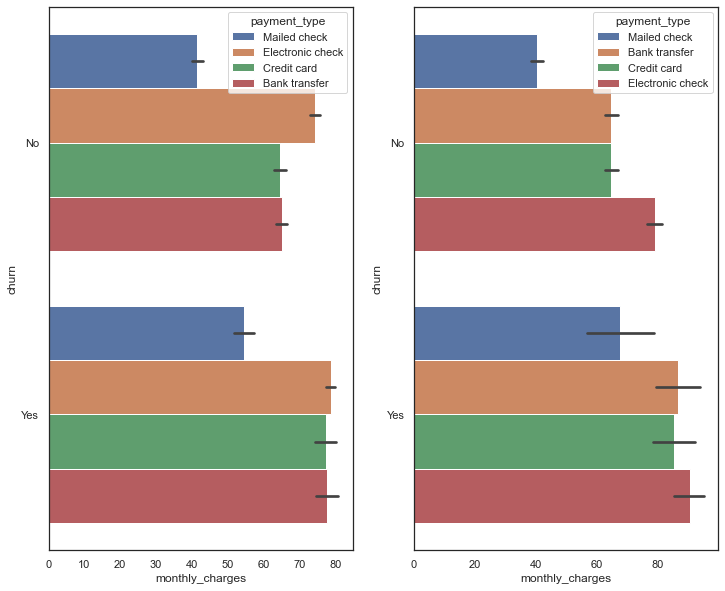

In [24]:
#does payment type influence churn?

plt.figure(figsize = (12 , 10))
plt.subplot(121)
sns.barplot(data = df,
           x = 'monthly_charges',
           y = 'churn',
           hue = 'payment_type')

plt.subplot(122)
sns.barplot(data = df_c,
           x = 'monthly_charges',
           y = 'churn',
           hue = 'payment_type')

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

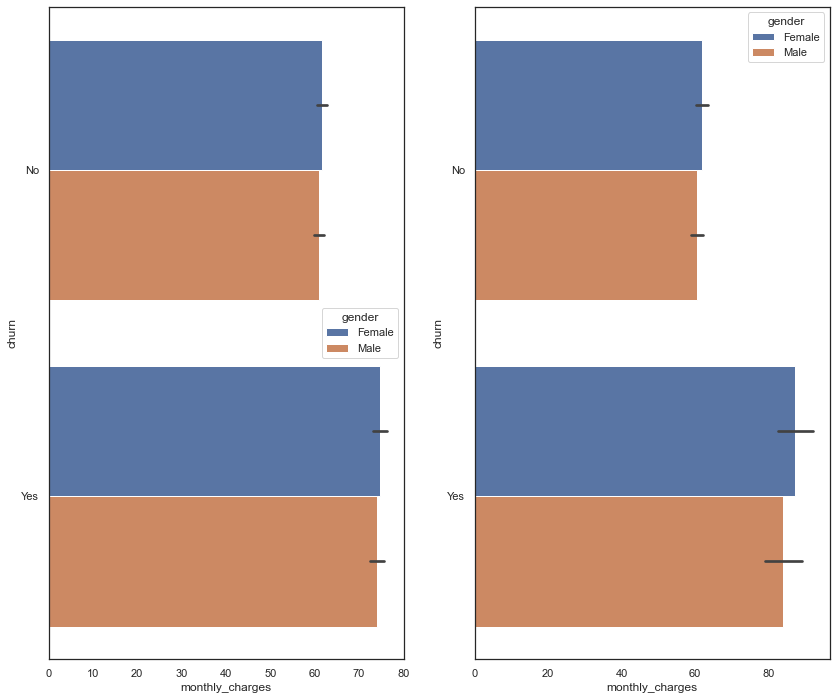

In [25]:
#does monthly_charges impact churn, by gender?

plt.figure(figsize = (14, 12))
plt.subplot(121)
sns.barplot(data = df,
           x = 'monthly_charges', 
           y = 'churn',
           hue = 'gender')

plt.subplot(122)
sns.barplot(data = df_c,
           x = 'monthly_charges', 
           y = 'churn',
           hue = 'gender')

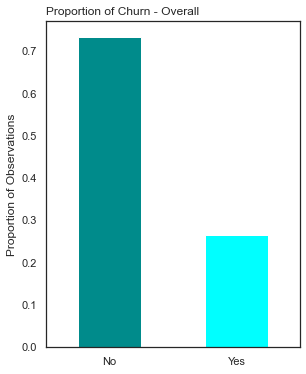

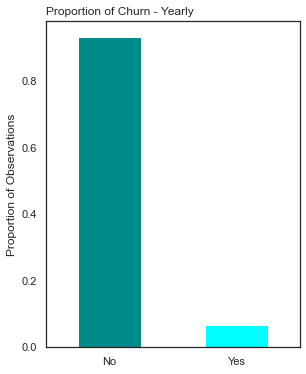

In [26]:
#normalized/proportions
fig = plt.figure(figsize = (10 , 6))
ax = fig.add_subplot(121)

#proportion of observation of each class
prop_response = df['churn'].value_counts(normalize = True)

#create a bar plot showing the percentage of churn
prop_response.plot(kind = 'bar',
                  ax = ax,
                  color = ['darkcyan', 'cyan'])

#set title and lables
ax.set_title('Proportion of Churn - Overall',
            fontsize = 12,
            loc = 'left')

ax.set_ylabel('Proportion of Observations',
             fontsize = 12)

ax.tick_params(rotation = 'auto')


#plot 2
fig = plt.figure(figsize = (10 , 6))
ax = fig.add_subplot(122)
prop_response = df_c['churn'].value_counts(normalize = True)
prop_response.plot(kind = 'bar',
                  ax = ax,
                  color = ['darkcyan', 'cyan'])
ax.set_title('Proportion of Churn - Yearly',
            fontsize = 12,
            loc = 'left')

ax.set_ylabel('Proportion of Observations',
            fontsize = 12)
ax.tick_params(rotation = 'auto')

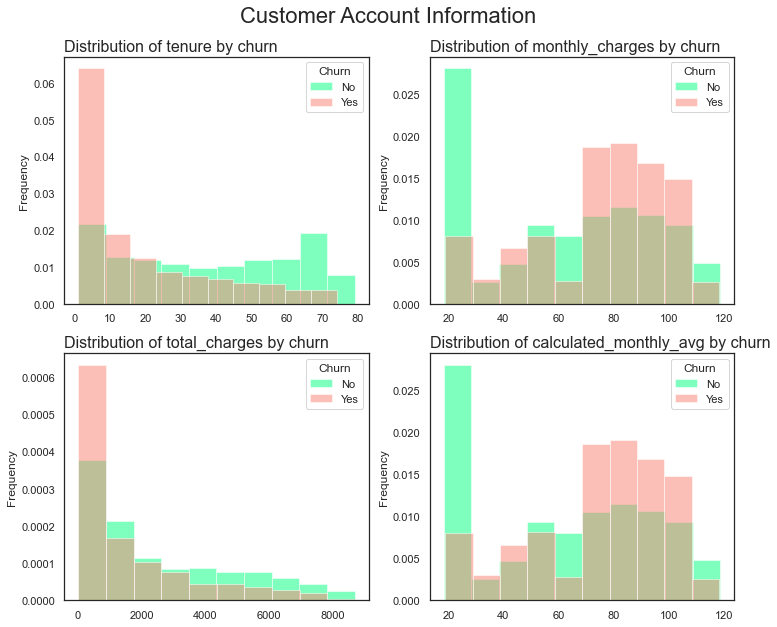

In [27]:
def histogram_plots(columns_to_plot, super_title):
    #set number of rows and columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #plot figure
    fig = plt.figure(figsize = (12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize = 22, y = .95)
    
    #loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        #create subplot
        ax = fig.add_subplot(number_of_rows , number_of_columns, index)
        
        #histograms for each class
        df[df['churn'] == 'No'][column].plot(kind = 'hist', 
                                                       ax = ax, 
                                                       density = True, 
                                                       alpha = 0.5, 
                                                       color = 'springgreen',
                                                       label = 'No')
        
        df[df['churn'] == 'Yes'][column].plot(kind = 'hist',
                                                        ax = ax,
                                                        density = True,
                                                        alpha = 0.5,
                                                        color = 'salmon', 
                                                        label = 'Yes')
    
        #set title and labels
    
        ax.set_title('Distribution of '+ column + ' by churn', 
                 fontsize = 16, loc = 'left')
        ax.tick_params(rotation = 'auto')
    
        ax.legend(loc = "upper right", bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),
                  title = 'Churn', fancybox = True)
    
    #eliminate frame from plot
    #spine_names = ('top', 'right', 'bottom', 'left')
    #for spine_name in spine_names:
    #    ax.spine[spine_name].set_visible(False)
        
# customer account column names

account_column_numeric = ['tenure', 'monthly_charges', 'total_charges', 'calculated_monthly_avg' ]
histogram_plots(account_column_numeric, 'Customer Account Information')

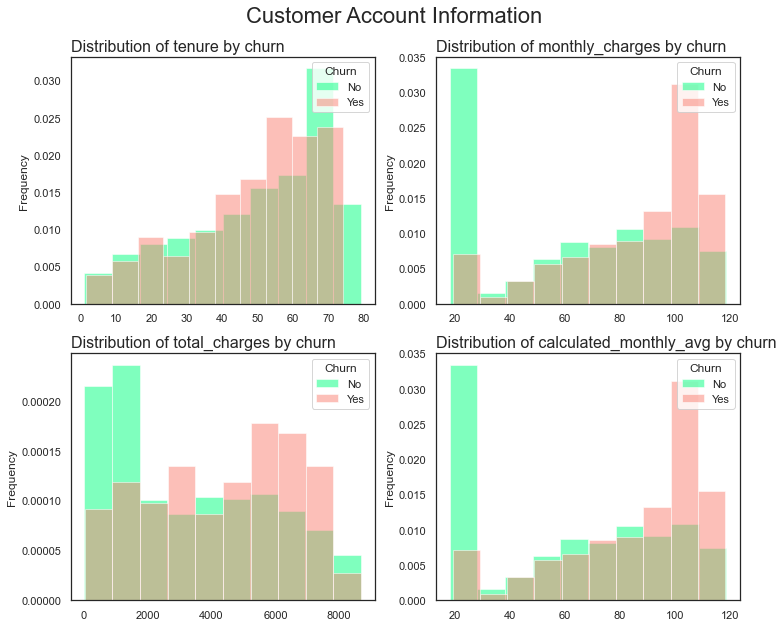

In [28]:
#create histogram function

def histogram_plots(columns_to_plot, super_title):
    #set number of rows and columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #plot figure
    fig = plt.figure(figsize = (12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize = 22, y = .95)
    
    #loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        #create subplot
        ax = fig.add_subplot(number_of_rows , number_of_columns, index)
        
        #histograms for each class
        df_c[df_c['churn'] == 'No'][column].plot(kind = 'hist', 
                                                       ax = ax, 
                                                       density = True, 
                                                       alpha = 0.5, 
                                                       color = 'springgreen',
                                                       label = 'No')
        
        df_c[df_c['churn'] == 'Yes'][column].plot(kind = 'hist',
                                                        ax = ax,
                                                        density = True,
                                                        alpha = 0.5,
                                                        color = 'salmon', 
                                                        label = 'Yes')
    
        #set title and labels
    
        ax.set_title('Distribution of '+ column + ' by churn', 
                 fontsize = 16, loc = 'left')
        ax.tick_params(rotation = 'auto')
    
        ax.legend(loc = "upper right", bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),
                  title = 'Churn', fancybox = True)
    
    #eliminate frame from plot
    #spine_names = ('top', 'right', 'bottom', 'left')
    #for spine_name in spine_names:
    #    ax.spine[spine_name].set_visible(False)
        
# customer account column names

account_column_numeric = ['tenure', 'monthly_charges', 'total_charges', 'calculated_monthly_avg' ]
histogram_plots(account_column_numeric, 'Customer Account Information')

In [29]:
#convert predictor variable, 'churn', into numeric binary variable to use w/ further insights like correlation/ML

df['churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['churn'].replace(to_replace = 'No', value = 0, inplace = True)

df_c['churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df_c['churn'].replace(to_replace = 'No', value = 0, inplace = True)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
df.corr() #churn shows in the correlation table now b/c it was converted to numeric binary

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,churn,tenure,is_female,has_phone,has_internet,has_phone_internet,partner_dependents,calculated_monthly_avg
is_senior_citizen,1.000000,0.114003,0.259023,-0.141963,0.219909,0.102420,0.150564,0.015194,0.001815,0.008474,0.182611,0.167542,-0.150652,0.219909
phone_service,0.114003,1.000000,0.308497,0.083903,0.491355,0.412479,0.035851,0.259046,0.010048,0.674863,0.083068,0.503942,0.032927,0.491355
internet_service,0.259023,0.308497,1.000000,-0.289183,0.905462,0.428483,0.316199,0.030559,0.009811,0.094051,0.825786,0.793167,-0.132341,0.905462
contract_type,-0.141963,0.083903,-0.289183,1.000000,-0.073149,0.449940,-0.396411,0.676786,-0.000261,0.003573,-0.242227,-0.212796,0.299882,-0.073149
monthly_charges,0.219909,0.491355,0.905462,-0.073149,1.000000,0.651228,0.192581,0.246148,0.013866,0.248063,0.763279,0.835841,-0.044193,1.000000
total_charges,0.102420,0.412479,0.428483,0.449940,0.651228,1.000000,-0.199608,0.825819,0.000094,0.113334,0.374981,0.405189,0.178317,0.651228
churn,0.150564,0.035851,0.316199,-0.396411,0.192581,-0.199608,1.000000,-0.354125,0.008858,0.010818,0.227837,0.209192,-0.182895,0.192581
tenure,0.015194,0.259046,0.030559,0.676786,0.246148,0.825819,-0.354125,1.000000,-0.004550,0.008647,0.036337,0.037775,0.277253,0.246148
is_female,0.001815,0.010048,0.009811,-0.000261,0.013866,0.000094,0.008858,-0.004550,1.000000,0.007024,0.005079,0.008987,-0.006802,0.013866
has_phone,0.008474,0.674863,0.094051,0.003573,0.248063,0.113334,0.010818,0.008647,0.007024,1.000000,-0.171998,0.484725,0.006258,0.248063


In [31]:
df_c.corr()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,churn,tenure,is_female,has_phone,has_internet,has_phone_internet,partner_dependents,calculated_monthly_avg
is_senior_citizen,1.000000,0.108405,0.205853,-0.069477,0.198208,0.203293,0.050430,0.131712,0.007656,0.025124,0.145530,0.152499,-0.146581,0.198208
phone_service,0.108405,1.000000,0.268772,0.077588,0.422206,0.451931,0.059916,0.297000,0.026492,0.686098,0.082442,0.488772,0.011103,0.422206
internet_service,0.205853,0.268772,1.000000,-0.153071,0.942764,0.808447,0.196196,0.315026,0.008263,-0.003791,0.853376,0.803738,-0.076517,0.942764
contract_type,-0.069477,0.077588,-0.153071,1.000000,-0.063631,0.141217,-0.167003,0.378502,0.011037,0.006862,-0.139105,-0.127274,0.135699,-0.063631
monthly_charges,0.198208,0.422206,0.942764,-0.063631,1.000000,0.889059,0.182134,0.386527,0.018431,0.140590,0.840576,0.878118,-0.053270,1.000000
total_charges,0.203293,0.451931,0.808447,0.141217,0.889059,1.000000,0.106937,0.699150,0.011354,0.131712,0.692475,0.732920,-0.000316,0.889059
churn,0.050430,0.059916,0.196196,-0.167003,0.182134,0.106937,1.000000,-0.020219,-0.021603,0.015266,0.145189,0.146273,-0.050936,0.182134
tenure,0.131712,0.297000,0.315026,0.378502,0.386527,0.699150,-0.020219,1.000000,-0.002278,0.031022,0.275087,0.278397,0.070251,0.386527
is_female,0.007656,0.026492,0.008263,0.011037,0.018431,0.011354,-0.021603,-0.002278,1.000000,0.019272,0.002538,0.013939,-0.025235,0.018431
has_phone,0.025124,0.686098,-0.003791,0.006862,0.140590,0.131712,0.015266,0.031022,0.019272,1.000000,-0.221646,0.389559,0.014853,0.140590


<AxesSubplot:>

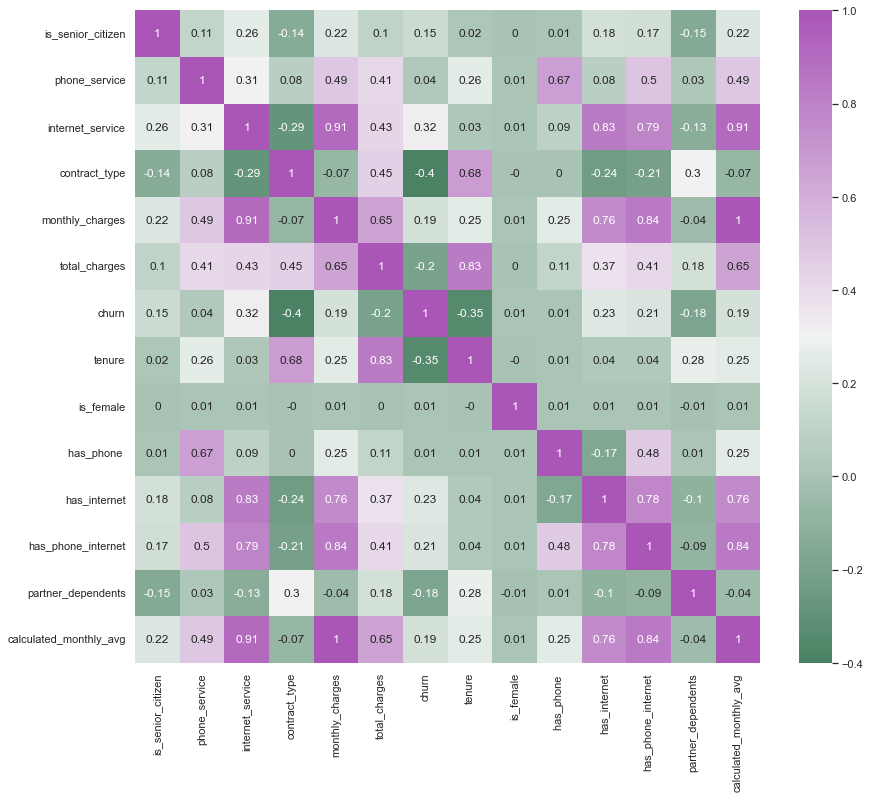

In [32]:

f, ax = plt.subplots(figsize = (14 , 12))
cmap1 = sns.diverging_palette(145, 300, s = 60, as_cmap = True)
sns.heatmap(data = round(df.corr(), 2),
           annot = True,
           cmap = cmap1)

<AxesSubplot:>

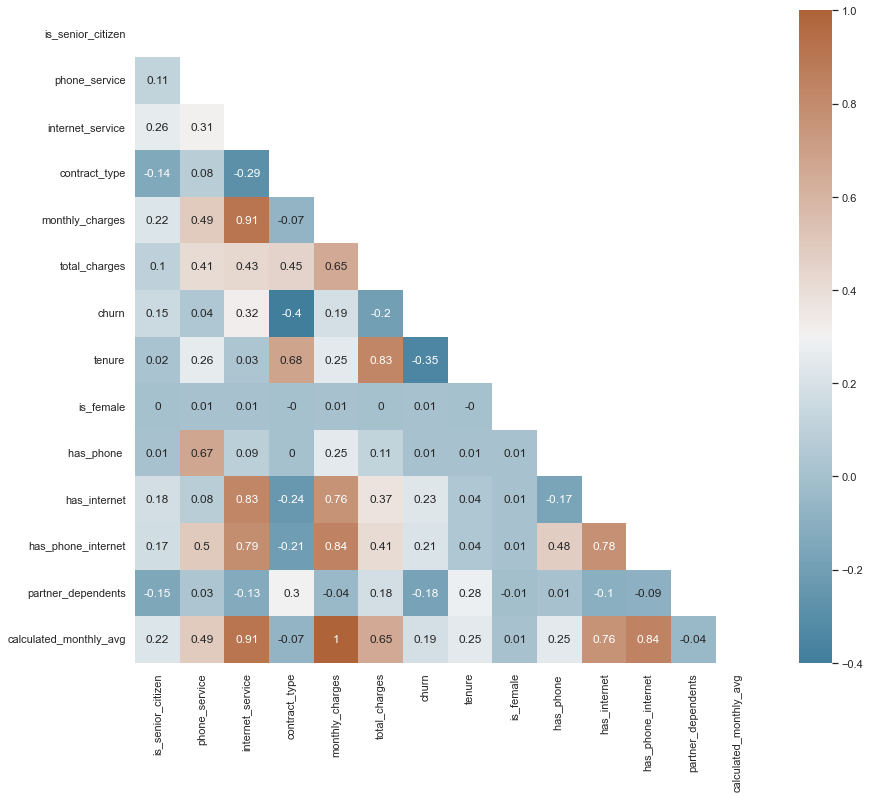

In [33]:
df_corr = round(df.corr(), 2)

f, ax = plt.subplots(figsize = (14, 12))
mask = np.triu(np.ones_like(df_corr, dtype = bool))
cmap = sns.diverging_palette(230, 30, as_cmap = True)

sns.heatmap(df_corr, 
            annot = True,
            mask = mask,
            cmap = cmap)

In [34]:
#convert all categorical variables to dummy variables

df_dummies = pd.get_dummies(df)
df_c_dummies = pd.get_dummies(df_c)

In [35]:
sns.set( style = 'white')

<AxesSubplot:>

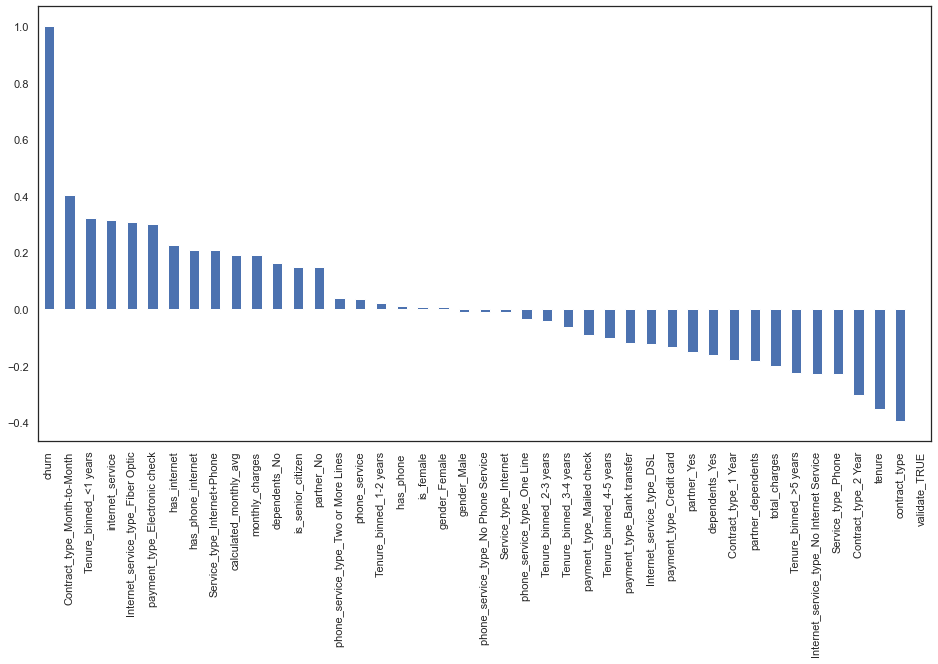

In [36]:
#dummy plot for overall contract types
plt.figure(figsize = (16 , 8))
df_dummies.corr()['churn'].sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:>

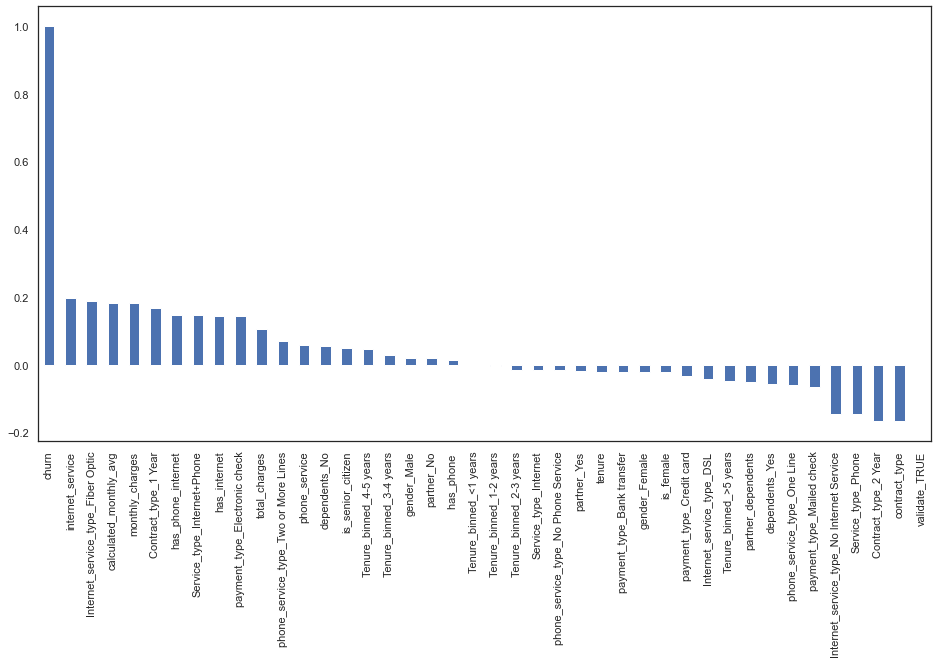

In [37]:
#dummy plot for yearly contracts
plt.figure(figsize = (16, 8))
df_c_dummies.corr()['churn'].sort_values(ascending = False).plot(kind = 'bar')

Text(0.5, 1.0, 'Distribution of Monthly Charges - Yearly')

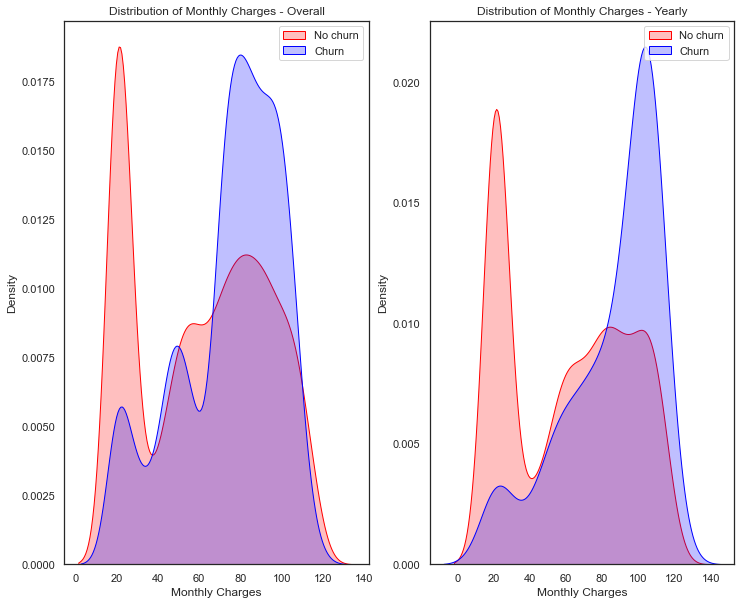

In [38]:
#distribution of monthly_charges and churn, overall and yearly
## at approx $68/mo in main dataset w/ MTM customers, churn becomes much more likely.

## at approximately, $80 in main dataset w/o MTM customers, churn becomes more likely. 
## - possible recommendation, customer incentives for tenure at the $80 threshold


plt.figure(figsize = (12, 10))
plt.subplot(121)
ax = sns.kdeplot(df.monthly_charges[df['churn'] == 0], color = 'Red', shade = True)

ax = sns.kdeplot(df.monthly_charges[df['churn'] == 1], ax = ax, color = 'Blue', shade = True)

ax.legend(['No churn', 'Churn'], loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges - Overall')

plt.subplot(122)

ax = sns.kdeplot(df_c.monthly_charges[df['churn'] == 0], color = 'Red', shade = True)

ax = sns.kdeplot(df_c.monthly_charges[df['churn'] == 1], ax = ax, color = 'Blue', shade = True)

ax.legend(['No churn', 'Churn'], loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges - Yearly')